В качестве исходного набора взять любой набор текстов на выбор.
https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews
https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews
https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews
https://www.kaggle.com/datasets/arushchillar/disneyland-reviews
Все эти наборы содержат отзывы (на разные тематики), поэтому целевой текст необходимо искать в соответствующем столбце.
Их необходимо предобработать (убрать лишнее, привести к нижнему регистру, лемматизировать и тд).
Все тексты необходимо преобразовать в список предложений, состоящих из слов.

Выбранный датасет - https://www.kaggle.com/datasets/arushchillar/disneyland-reviews

In [88]:
import pandas as pd

dataframe = pd.read_csv('./DisneylandReviews.csv', encoding='latin-1')
dataframe.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


Все эти наборы содержат отзывы (на разные тематики), поэтому целевой текст необходимо искать в соответствующем столбце.
Их необходимо предобработать (убрать лишнее, привести к нижнему регистру, лемматизировать и тд).
Все тексты необходимо преобразовать в список предложений, состоящих из слов.

In [122]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from string import punctuation

def preprocess(text):
    sentences = sent_tokenize(text)
    # Lower case
    sentences = [sentence.lower() for sentence in sentences]
    # Remove punctuation
    sentences = [''.join(c for c in sentence if c not in punctuation) for sentence in sentences]
    # Tokenize words
    sentences = [word_tokenize(sentence) for sentence in sentences]
    # Remove stopwords
    stop_words = stopwords.words('english')
    sentences = [[word for word in sentence if word not in stop_words] for sentence in sentences]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    sentences = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in sentences]
    return sentences

    



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [124]:
pd.set_option('mode.chained_assignment', None)
dataframe['Review_Text_Preprocess'] = ''
print(len(dataframe['Review_Text']))
for i, review in enumerate(dataframe['Review_Text']):
    if i % 1000 == 0:
        print(f"{i} / {len(dataframe['Review_Text'])}")
    preprocessed_review = preprocess(review)
    dataframe['Review_Text_Preprocess'].iloc[i] = preprocessed_review

42656
0 / 42656
1000 / 42656
2000 / 42656
3000 / 42656
4000 / 42656
5000 / 42656
6000 / 42656
7000 / 42656
8000 / 42656
9000 / 42656
10000 / 42656
11000 / 42656
12000 / 42656
13000 / 42656
14000 / 42656
15000 / 42656
16000 / 42656
17000 / 42656
18000 / 42656
19000 / 42656
20000 / 42656
21000 / 42656
22000 / 42656
23000 / 42656
24000 / 42656
25000 / 42656
26000 / 42656
27000 / 42656
28000 / 42656
29000 / 42656
30000 / 42656
31000 / 42656
32000 / 42656
33000 / 42656
34000 / 42656
35000 / 42656
36000 / 42656
37000 / 42656
38000 / 42656
39000 / 42656
40000 / 42656
41000 / 42656
42000 / 42656


In [125]:
dataframe.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Review_Text_Preprocess
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,"[[youve, ever, disneyland, anywhere, youll, fi..."
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,"[[since, last, time, visit, hk, disneyland], [..."
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,"[[thanks, god, hot, humid, visiting, park, oth..."
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,"[[hk, disneyland, great, compact, park], [unfo..."
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,"[[location, city, took, around, 1, hour, kowlo..."


In [132]:
# Join all Review_Text_Preprocess into one list into column Review_Text_Preprocess_Joined
dataframe['Review_Text_Preprocess_Joined'] = ''
for i, review in enumerate(dataframe['Review_Text_Preprocess']):
    if i % 1000 == 0:
        print(f"{i} / {len(dataframe['Review_Text_Preprocess'])}")
    dataframe['Review_Text_Preprocess_Joined'].iloc[i] = [word for sentence in review for word in sentence]

0 / 42656
1000 / 42656
2000 / 42656
3000 / 42656
4000 / 42656
5000 / 42656
6000 / 42656
7000 / 42656
8000 / 42656
9000 / 42656
10000 / 42656
11000 / 42656
12000 / 42656
13000 / 42656
14000 / 42656
15000 / 42656
16000 / 42656
17000 / 42656
18000 / 42656
19000 / 42656
20000 / 42656
21000 / 42656
22000 / 42656
23000 / 42656
24000 / 42656
25000 / 42656
26000 / 42656
27000 / 42656
28000 / 42656
29000 / 42656
30000 / 42656
31000 / 42656
32000 / 42656
33000 / 42656
34000 / 42656
35000 / 42656
36000 / 42656
37000 / 42656
38000 / 42656
39000 / 42656
40000 / 42656
41000 / 42656
42000 / 42656


Для построения модели используется конструктор с большим количеством параметров:
gensim.models.word2vec.Word2Vec(
    sentences=None, 
    corpus_file=None, 
    vector_size=100, 
    alpha=0.025, 
    window=5, 
    min_count=5, 
    max_vocab_size=None, 
    sample=0.001, 
    seed=1, 
    workers=3, 
    min_alpha=0.0001, 
    sg=0, 
    hs=0, 
    negative=5, 
    ns_exponent=0.75, 
    cbow_mean=1, 
    hashfxn=<built-infunctionhash>, 
    epochs=5, 
    null_word=0, 
    trim_rule=None, 
    sorted_vocab=1, 
    batch_words=10000, 
    compute_loss=False, 
    callbacks=(), 
    comment=None, 
    max_final_vocab=None, 
    shrink_windows=True
)

Например:
word2vec = Word2Vec(all_words, min_count = 2, vector_size=20, sg=0)

Предложения передаются в параметр sentences. Размер вектора можно указать с помощью vector_size, min_count – обозначает, какие слова попадут в словарь (например, встречающиеся минимум 2 раза. Параметр sg обозначает выбор модели.

Вывести список похожих слов можно с помощью команды:
word2vec.wv.most_similar('word')

In [160]:
from gensim.models import Word2Vec

model = Word2Vec(dataframe['Review_Text_Preprocess_Joined'], min_count=5, vector_size=100, sg=0, window=5, workers=6, seed=42, epochs=25, batch_words=10000, compute_loss=True, hs=0, negative=10)

In [166]:
print(dataframe['Review_Text_Preprocess_Joined'].iloc[0][5])
model.wv.most_similar(dataframe['Review_Text_Preprocess_Joined'].iloc[0][5])

find


[('locate', 0.6161383390426636),
 ('found', 0.5993202328681946),
 ('finding', 0.5772181153297424),
 ('navigate', 0.5159398317337036),
 ('figure', 0.498564213514328),
 ('notice', 0.4847654700279236),
 ('maneuver', 0.4822237193584442),
 ('get', 0.47600218653678894),
 ('negotiate', 0.45245227217674255),
 ('pressed', 0.45240479707717896)]

In [168]:
# Save csv and model
dataframe.to_csv('./DisneylandReviewsPreprocessed.csv')
model.save('./DisneylandReviewsWord2Vec.model')

4 Использовать визуализацию для представления результатов. Необходимо для нескольких слов (выбрать самим) найти наиболее контекстно близкие и отобразить их. Для этого можно использовать метод уменьшения размерности t-SNE.

In [1]:
# Load model and csv
from gensim.models import Word2Vec

import pandas as pd

model = Word2Vec.load('./DisneylandReviewsWord2Vec.model')
data = pd.read_csv('./DisneylandReviewsPreprocessed.csv')

In [23]:
words = ["find","fun","anywhere"]

In [29]:
# Print most similar words to words
for word in words:
    print(f"Most similar words to {word}:")
    for similar_word in model.wv.most_similar(word, topn=10):
        print(similar_word)
    print()

Most similar words to find:
('locate', 0.6161383390426636)
('found', 0.5993202328681946)
('finding', 0.5772181153297424)
('navigate', 0.5159398317337036)
('figure', 0.498564213514328)
('notice', 0.4847654700279236)
('maneuver', 0.4822237193584442)
('get', 0.47600218653678894)
('negotiate', 0.45245227217674255)
('pressed', 0.45240479707717896)

Most similar words to fun:
('enjoyable', 0.6294865608215332)
('exciting', 0.6286556720733643)
('enjoy', 0.6129305958747864)
('great', 0.5933736562728882)
('love', 0.5819599628448486)
('enjoyed', 0.5752015113830566)
('awesome', 0.5579339265823364)
('enjoys', 0.5484433174133301)
('loved', 0.5320765376091003)
('wonderful', 0.5300375819206238)

Most similar words to anywhere:
('somewhere', 0.6765646934509277)
('anything', 0.635578989982605)
('nowhere', 0.566463053226471)
('anyplace', 0.491852730512619)
('everywhere', 0.46310943365097046)
('someplace', 0.43023309111595154)
('someone', 0.4250892698764801)
('something', 0.3966165781021118)
('nothing', 0

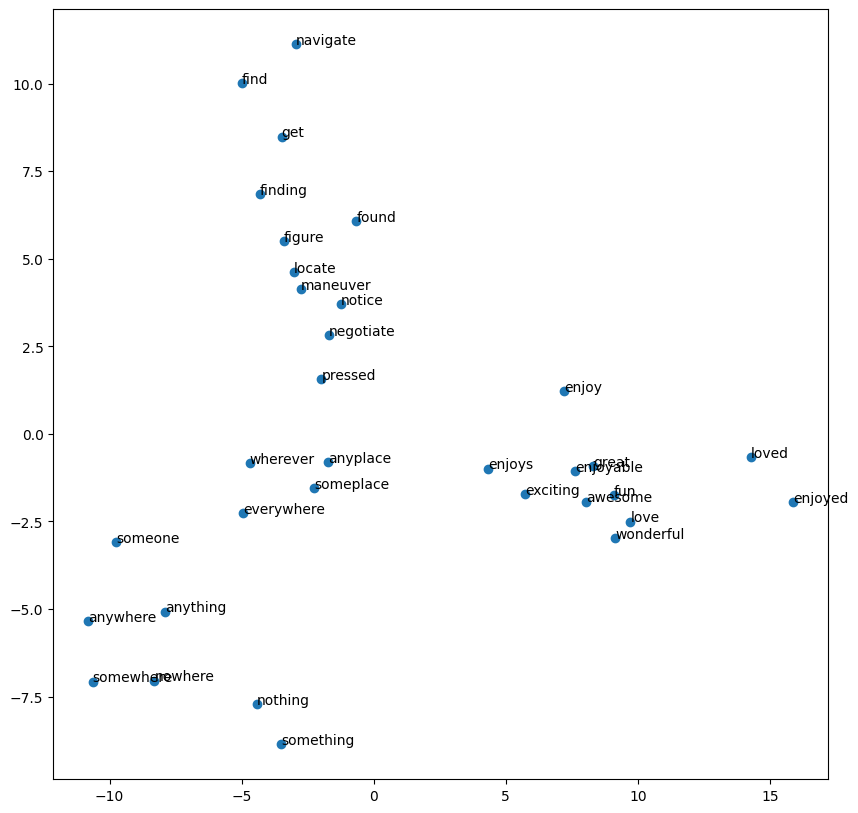

In [41]:
# Visualize the words with the most similar words to them (top 10)
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

similar_words = []
for word in words:
    for similar_word in model.wv.most_similar(word, topn=10):
        similar_words.append(similar_word[0])
    similar_words.append(word)

def visualize(words):
    # Visualize the words with the most similar words to them (top 10)
    X = model.wv[words]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    plt.figure(figsize=(10,10))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    plt.show()


visualize(similar_words)